In [4]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import sys
from pyspark.sql import SparkSession

In [5]:
spark = SparkSession.builder \
.master("local") \
.appName("Exercise1") \
.getOrCreate()

df = spark.read.csv('exampleData.csv', header=True, inferSchema=True)

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Scatter Plot of Precipitation vs. Air Temperature')

Text(0.5, 0, 'Precipitation')

Text(0, 0.5, 'Air Temperature')

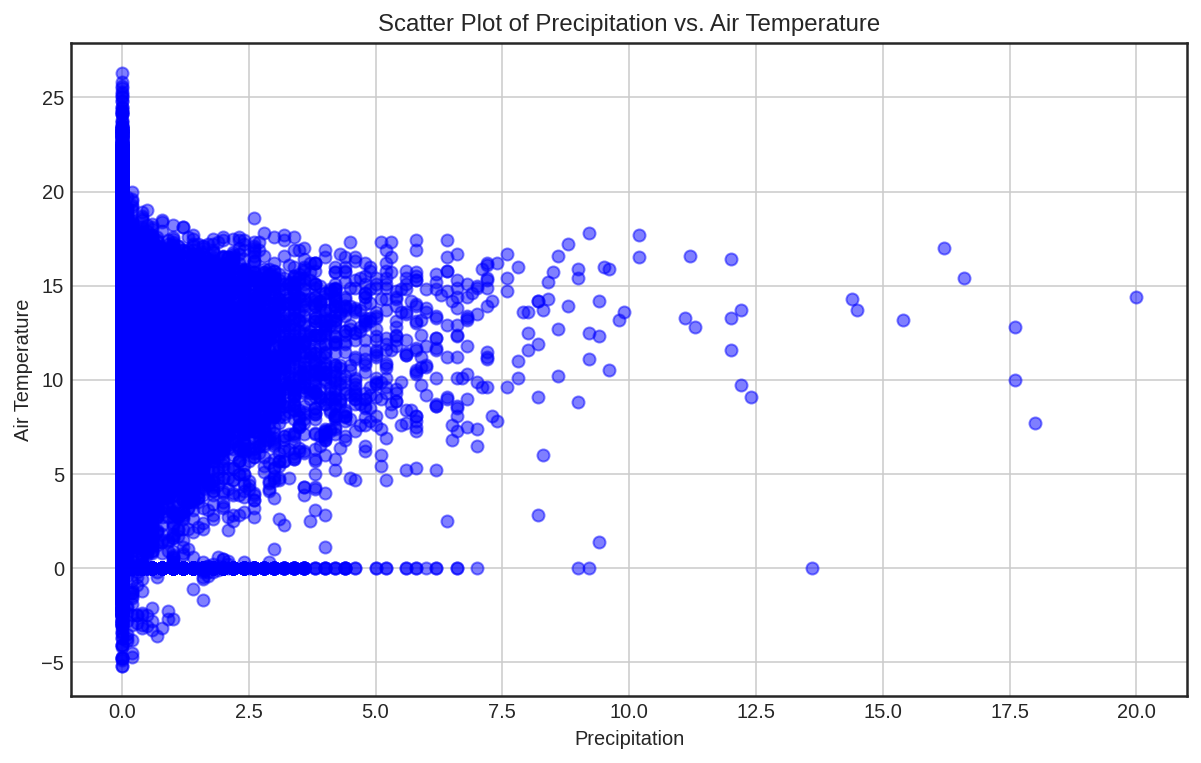

In [10]:
dff = df.toPandas()

#This will most likely give a type error because of dtype object, you can use the following code to convert object data to numerical type. This code should be called before the plot line above.
dff['precipitation'] = pd.to_numeric(dff.precipitation,errors='coerce')
dff['air_temperature'] = pd.to_numeric(dff.air_temperature,errors='coerce')

plt.figure(figsize=(10, 6))
plt.scatter(dff['precipitation'], dff['air_temperature'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Precipitation vs. Air Temperature')
plt.xlabel('Precipitation')
plt.ylabel('Air Temperature')
# plt.xticks(range(0, int(dff['precipitation'].max())+1, 10))  # Specify step size for x-axis
# plt.yticks(range(0, int(dff['air_temperature'].max())+1, 5))  # Specify step size for y-axis
plt.grid(True)
plt.show()

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Scatter Plot of Relative Humidity vs. Wind Speed')

Text(0.5, 0, 'Humidity')

Text(0, 0.5, 'Wind Speed')

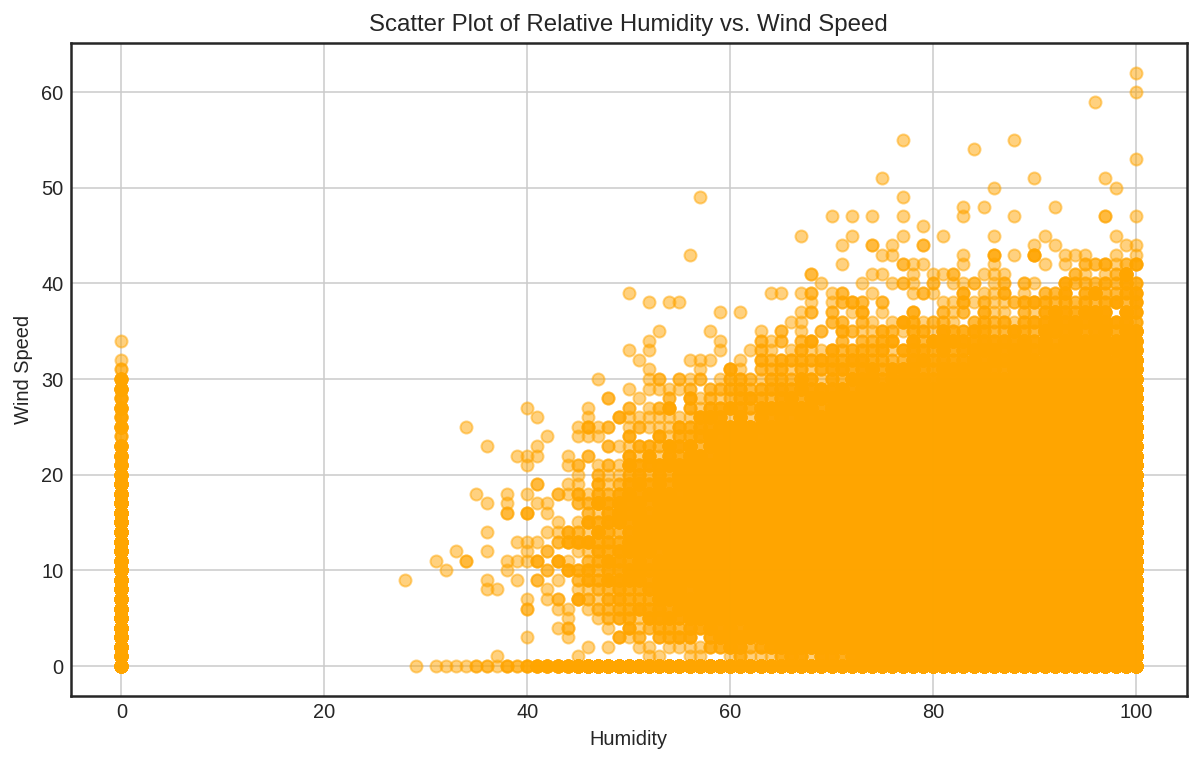

In [39]:
#This will most likely give a type error because of dtype object, you can use the following code to convert object data to numerical type. This code should be called before the plot line above.
dff['relative_humidity'] = pd.to_numeric(dff.relative_humidity,errors='coerce')
dff['wind_speed'] = pd.to_numeric(dff.wind_speed,errors='coerce')

plt.figure(figsize=(10, 6))
plt.scatter(dff['relative_humidity'], dff['wind_speed'], color='orange', alpha=0.5)
plt.title('Scatter Plot of Relative Humidity vs. Wind Speed')
plt.xlabel('Humidity')
plt.ylabel('Wind Speed')
# plt.xticks(range(0, int(dff['precipitation'].max())+1, 10))  # Specify step size for x-axis
# plt.yticks(range(0, int(dff['air_temperature'].max())+1, 5))  # Specify step size for y-axis
plt.grid(True)
plt.show()

<Figure size 720x432 with 0 Axes>

(array([2.38095e+05, 4.04000e+03, 1.45600e+03, 5.53000e+02, 2.68000e+02,
        1.28000e+02, 7.10000e+01, 3.50000e+01, 1.90000e+01, 1.60000e+01,
        2.00000e+00, 4.00000e+00, 6.00000e+00, 1.00000e+00, 2.00000e+00,
        1.00000e+00, 2.00000e+00, 3.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'Histogram of Precipitation')

Text(0.5, 0, 'Precipitation')

Text(0, 0.5, 'Frequency')

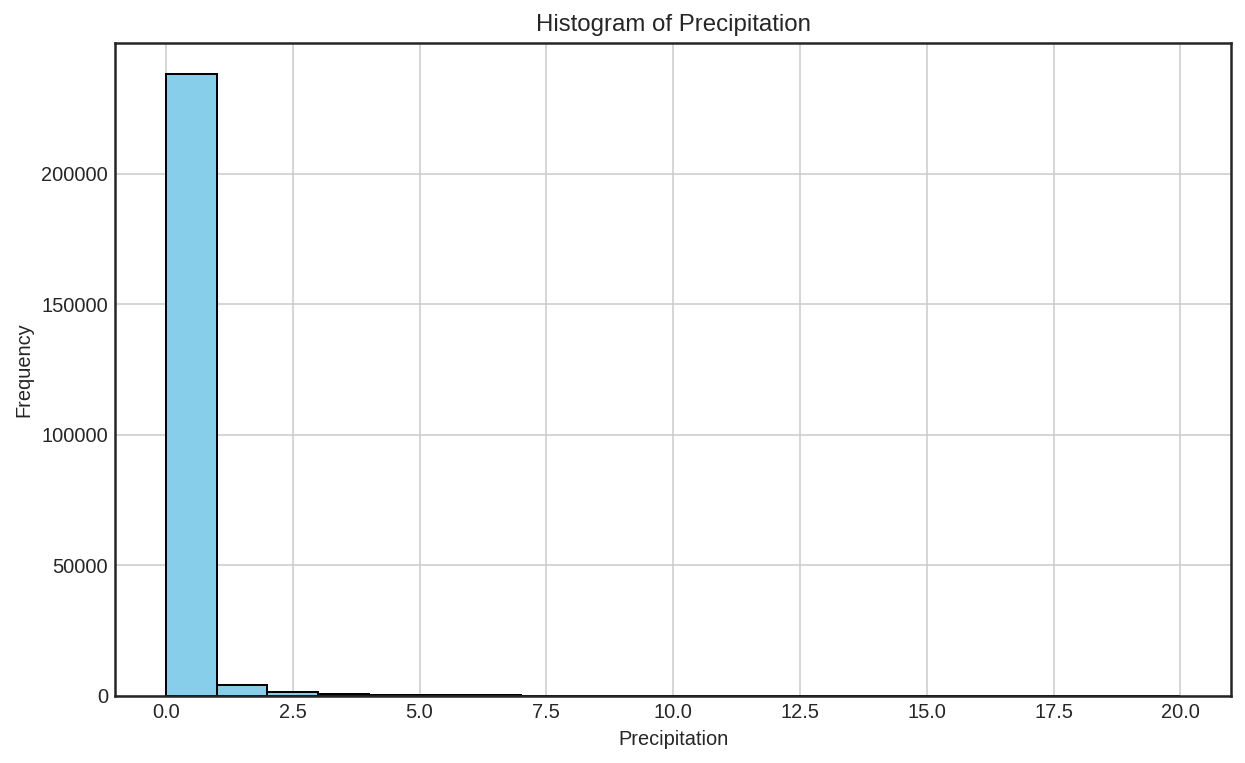

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(dff['precipitation'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<Figure size 720x432 with 0 Axes>

(array([1.70847e+05, 6.45850e+04, 8.90300e+03, 3.91000e+02, 1.30000e+01]),
 array([ 0. , 12.4, 24.8, 37.2, 49.6, 62. ]),
 <BarContainer object of 5 artists>)

Text(0.5, 1.0, 'Histogram of Precipitation')

Text(0.5, 0, 'Wind Speed')

Text(0, 0.5, 'Frequency')

([<matplotlib.axis.XTick at 0x7f6772190b50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

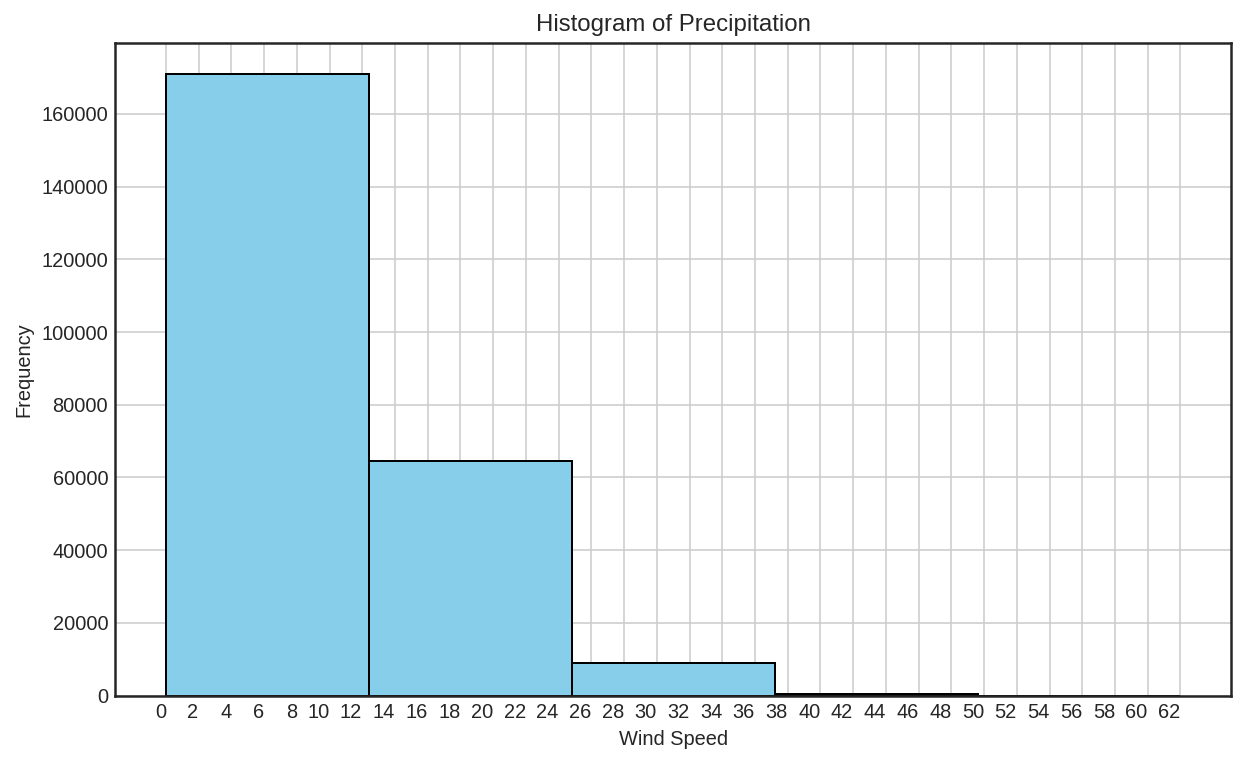

In [33]:
plt.figure(figsize=(10, 6))
dff['wind_speed'] = pd.to_numeric(dff['wind_speed'], errors='coerce')
dff = dff.dropna(subset=['wind_speed'])
dff_sorted = dff.sort_values(by='wind_speed')
plt.hist(dff_sorted['wind_speed'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of Precipitation')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.xticks(range(0, int(dff_sorted['wind_speed'].max())+1, 2), ha='right')
plt.grid(True)
plt.show()

<Figure size 720x432 with 0 Axes>

(array([9.90000e+01, 0.00000e+00, 7.00000e+00, 1.01776e+05, 1.16576e+05]),
 array([-49.  , -34.46, -19.92,  -5.38,   9.16,  23.7 ]),
 <BarContainer object of 5 artists>)

Text(0.5, 1.0, 'Histogram of Precipitation')

Text(0.5, 0, 'Wetb')

Text(0, 0.5, 'Frequency')

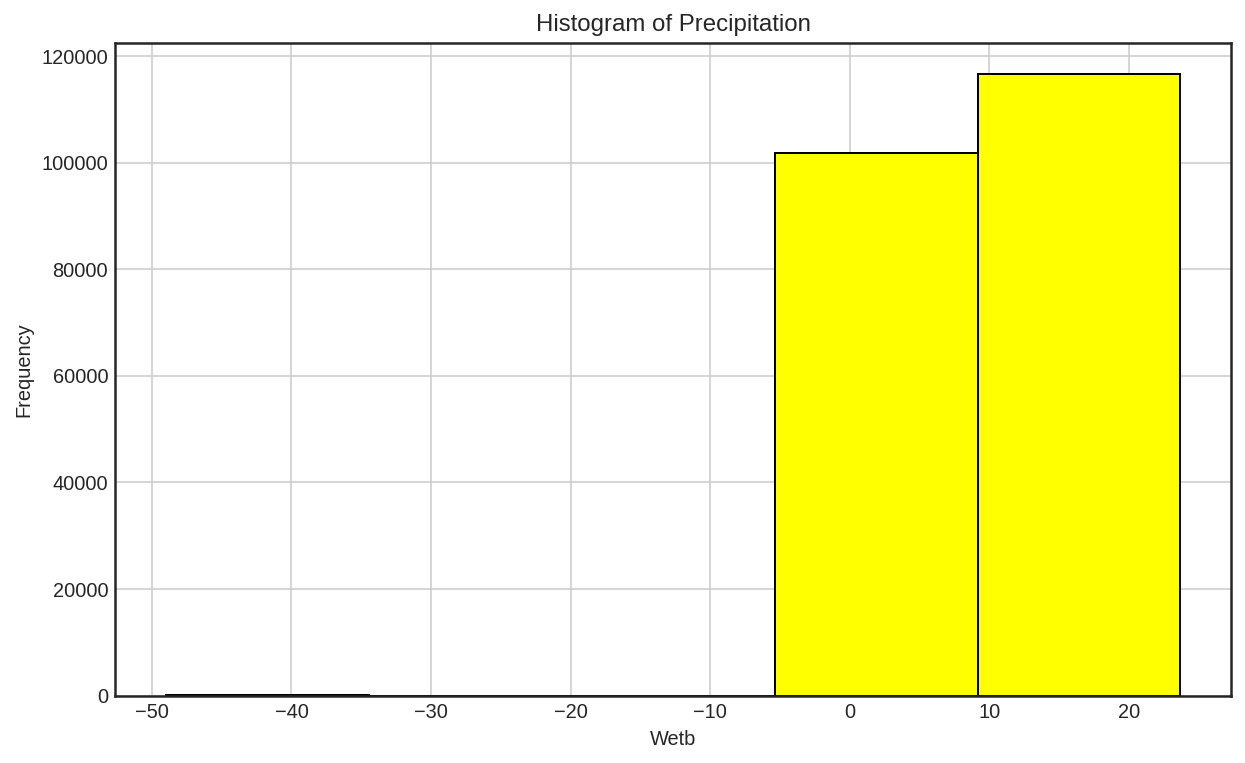

In [38]:
plt.figure(figsize=(10, 6))
dff['wetb'] = pd.to_numeric(dff['wetb'], errors='coerce')
dff = dff.dropna(subset=['wetb'])
dff_sorted = dff.sort_values(by='wetb')
plt.hist(dff_sorted['wetb'], bins=5, color='yellow', edgecolor='black')
plt.title('Histogram of Precipitation')
plt.xlabel('Wetb')
plt.ylabel('Frequency')
# plt.xticks(range(0, int(dff_sorted['wetb'].max())+1, 2), ha='right')
plt.grid(True)
plt.show()

In [32]:
dff.columns

Index(['_c0', 'dateTime', 'indicator_rain', 'precipitation', 'indicator_temp',
       'air_temperature', 'indicator_wetb', 'wetb', 'dewpt', 'vappr',
       'relative_humidity', 'msl', 'indicator_wdsp', 'wind_speed',
       'indicator_wddir', 'wind_from_direction'],
      dtype='object')